In [2]:
library(Seurat)
library(dplyr)
WT_PATH<- "data/WT_TRAF6_10X/filtered_gene_bc_matrices/mm10"
KO_PATH<- "data/KO_TRAF6_10X/filtered_gene_bc_matrices/mm10"

Warning message:
“package ‘Seurat’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
wt_data <- Read10X(data.dir = WT_PATH)
ko_data <- Read10X(data.dir = KO_PATH)
dim(wt_data)
dim(ko_data)

[1] 28692  2880

[1] 28692  2341

In [4]:
wt = CreateSeuratObject(counts = wt_data, project = "wt", min.cells = 3, min.features = 200)
ko = CreateSeuratObject(counts = ko_data, project = "ko", min.cells = 3, min.features = 200)
combined = merge(wt, y = ko, add.cell.ids = c("wt", "ko"), project="combined")

In [5]:
combined = subset(combined, subset = nFeature_RNA > 200 & nFeature_RNA < 2500)

In [6]:
combined = NormalizeData(combined)

In [7]:
combined.genes = rownames(combined)
combined = ScaleData(combined, features = combined.genes)

Centering and scaling data matrix



In [8]:
combined = FindVariableFeatures(combined, selection.method = "vst", nfeatures = 2000)

In [9]:
combined <- RunPCA(combined, features = VariableFeatures(object = combined))

PC_ 1 
Positive:  Rps18, Gm10709, Rplp1, Rpl13, Rpl32, Rps19, Rps14, Rpl35, Rps5, Rpl18a 
	   Rpl12, Rps12, Rpsa, Gm10073, Rpl37a, Rps12-ps3, Rps20, Rps11, Rps6, Rpl36a 
	   Rpl13-ps3, Gm9493, Gm8730, Rps2, Rplp0, Rps28, Rpl10-ps3, Rps18-ps3, Gm11808, Gm2000 
Negative:  Trbc2, Eef2, S100a4, Rpl29, Cxcr6, Lgals1, Itgb7, Klrc1, Itgb1, Lgals3 
	   Ahnak, Pabpc1, Erdr1, Id2, Lfng, Btg1, Itgb2, Ccr2, Gzmb, Vim 
	   Ccl4, S100a6, Cd6, Zeb2, Tob1, Maf, Neat1, Sla, Ankrd11, Rora 
PC_ 2 
Positive:  Trbc2, Actb, Tmem176a, Maf, Tmem176b, Actn2, 5830411N06Rik, Nebl, Klrb1c, Cd40lg 
	   S1pr5, Cd163l1, Cxcr6, Ckb, Dbr1, Ikzf2, Id2, Serpinb1a, Tnfrsf25, Rpl29 
	   Gm9828, Il17re, Lbhd1, S100a6, Crip1, Ccl5, Gm10522, Adrb2, Tnnt1, Hbb-bt 
Negative:  Rps18, Plac8, Gm42418, Ikzf1, mt-Atp8, Rps5, Ccnd2, Rpl13, Gm8730, Wnk1 
	   Rpl13-ps3, Dapl1, Gm26917, Akap13, Rplp0, Ppp2r5a, Arhgap30, Fyn, Hnrnpd, Rps19 
	   Macf1, Rpl35, Rps18-ps3, Rps14, Stat1, Rpl32, Luc7l2, Rps12-ps3, PISD, Nsa2 
PC_ 3 
Positive:

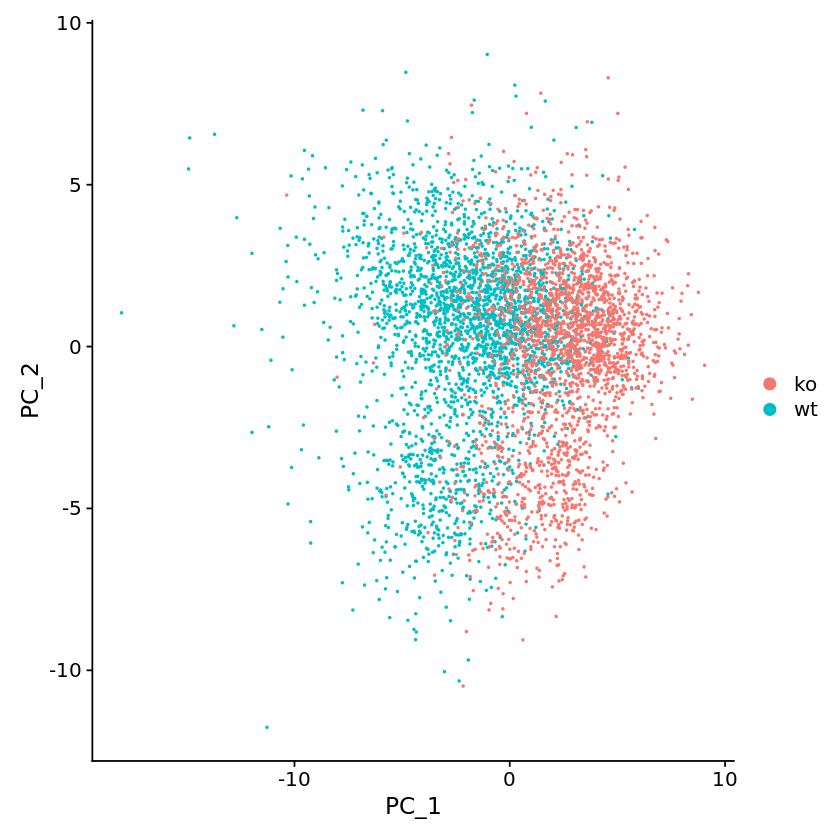

In [10]:
DimPlot(combined, reduction = "pca", group.by = "orig.ident")

In [11]:
combined = FindNeighbors(combined, dims = 1:10)
combined = FindClusters(combined, resolution = 0.6)
combined = RunUMAP(combined, dims = 1:10)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4872
Number of edges: 155390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7967
Number of communities: 7
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
00:33:02 UMAP embedding parameters a = 0.9922 b = 1.112

00:33:02 Read 4872 rows and found 10 numeric columns

00:33:02 Using Annoy for neighbor search, n_neighbors = 30

00:33:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:33:03 Writing NN index file to temp file /tmp/Rtmp4ZSPJW/file3b5838fcfb5b

00:33:03 Searching Annoy index using 1 thread, search_k = 3000

00:33:04 Annoy recall = 100%

00:33:04 Commencing smooth kNN distance calibration using 1 thread

00:33:05 Initializing fro

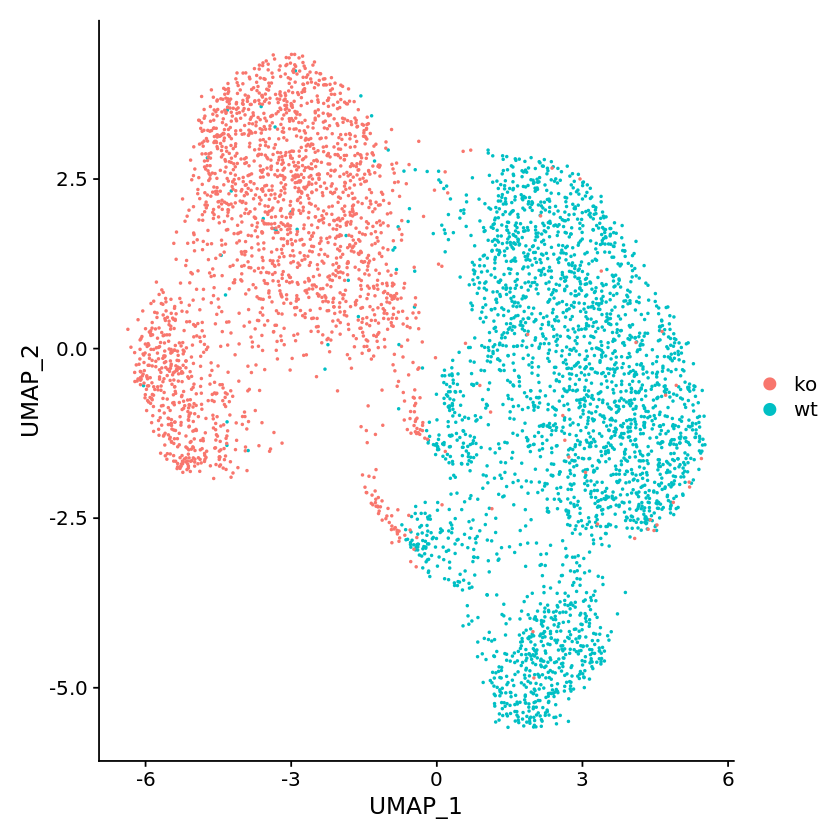

In [12]:
DimPlot(combined, reduction = "umap", group.by = "orig.ident")

In [17]:
WT_PATH = "data/WT_TRAF6_10X/filtered_gene_bc_matrices/mm10"
KO_PATH = "data/KO_TRAF6_10X/filtered_gene_bc_matrices/mm10"
wt_data = Read10X(data.dir = WT_PATH)
ko_data = Read10X(data.dir = KO_PATH)
wt = CreateSeuratObject(counts = wt_data, project = "wt", min.cells = 3, min.features = 200)
ko = CreateSeuratObject(counts = ko_data, project = "ko", min.cells = 3, min.features = 200)

In [18]:
dataset.list = list(wt = wt, ko = ko)

In [19]:
for (i in names(dataset.list)) {
    dataset.list[[i]] <- NormalizeData(dataset.list[[i]], verbose = FALSE)
    dataset.list[[i]] <- FindVariableFeatures(dataset.list[[i]], selection.method = "vst", 
        nfeatures = 2000, verbose = FALSE)
}

In [21]:
dataset.anchors <- FindIntegrationAnchors(object.list = dataset.list, dims = 1:30)
dataset.integrated <- IntegrateData(anchorset = dataset.anchors, dims = 1:30)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9195 anchors

Filtering anchors

	Retained 1406 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Adding a command log without an assay associated with it”


In [22]:
library(ggplot2)
library(cowplot)
library(patchwork)
# switch to integrated assay. The variable features of this assay are automatically
# set during IntegrateData
DefaultAssay(dataset.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
dataset.integrated <- ScaleData(dataset.integrated, verbose = FALSE)
dataset.integrated <- RunPCA(dataset.integrated, npcs = 30, verbose = FALSE)
dataset.integrated <- RunUMAP(dataset.integrated, reduction = "pca", dims = 1:30)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘cowplot’ was built under R version 4.0.2”
Warning message:
“package ‘patchwork’ was built under R version 4.0.3”

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


19:11:16 UMAP embedding parameters a = 0.9922 b = 1.112

19:11:16 Read 5221 rows and found 30 numeric columns

19:11:16 Using Annoy for neighbor search, n_neighbors = 30

19:11:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:11:16 Writing NN index file to temp file /tmp/Rtmp4ZSPJW/file3b5878a653c8

19:11:16 Searching Annoy index using 1 thread, search_k = 3000

19:11:18 Annoy recall = 100%

19:11:18 Commencing smooth kNN distance calibration using 1 th

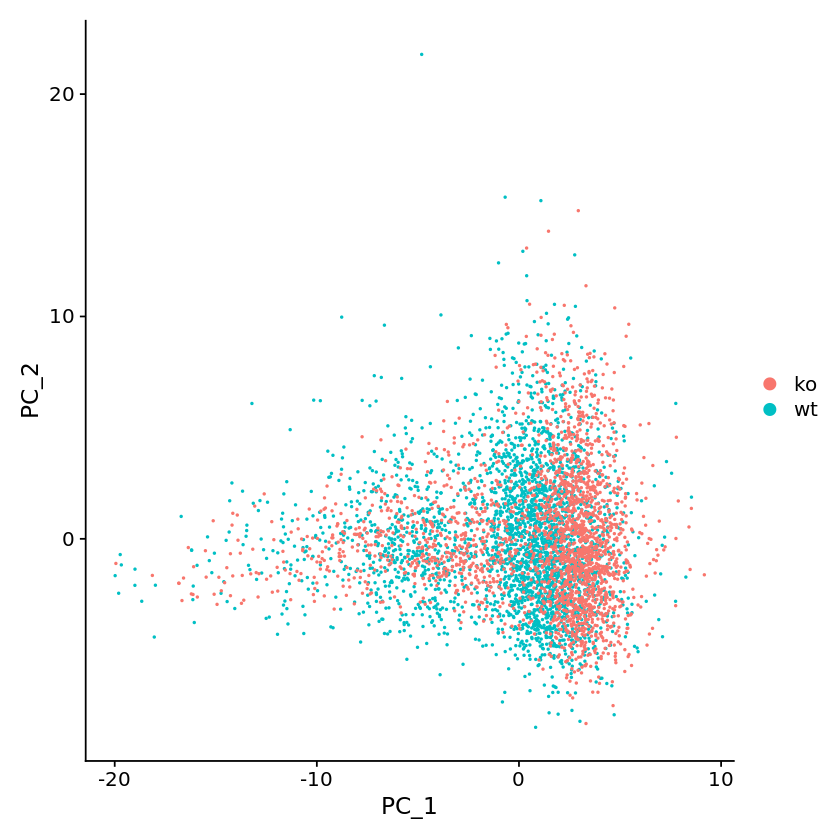

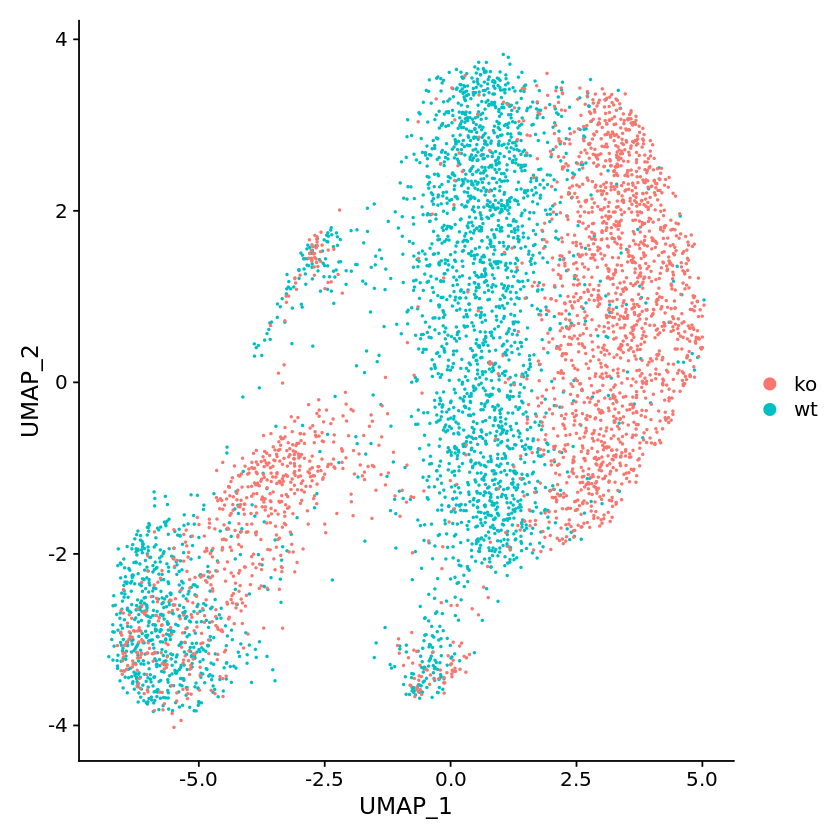

In [23]:
DimPlot(dataset.integrated, reduction = "pca", group.by = "orig.ident")
DimPlot(dataset.integrated, reduction = "umap", group.by = "orig.ident")